In [1]:
import numpy
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
ctoi = {chr(i): ord(chr(i))-ord('a')+1 for i in range(ord('a'), ord('z')+1)}
ctoi['.'] = 0
N = torch.zeros((27, 27), dtype=torch.int32)
itoc = {i: c for c, i in ctoi.items()}

In [4]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = ctoi[ch1]
    ix2 = ctoi[ch2]
    N[ix1, ix2] += 1
    

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

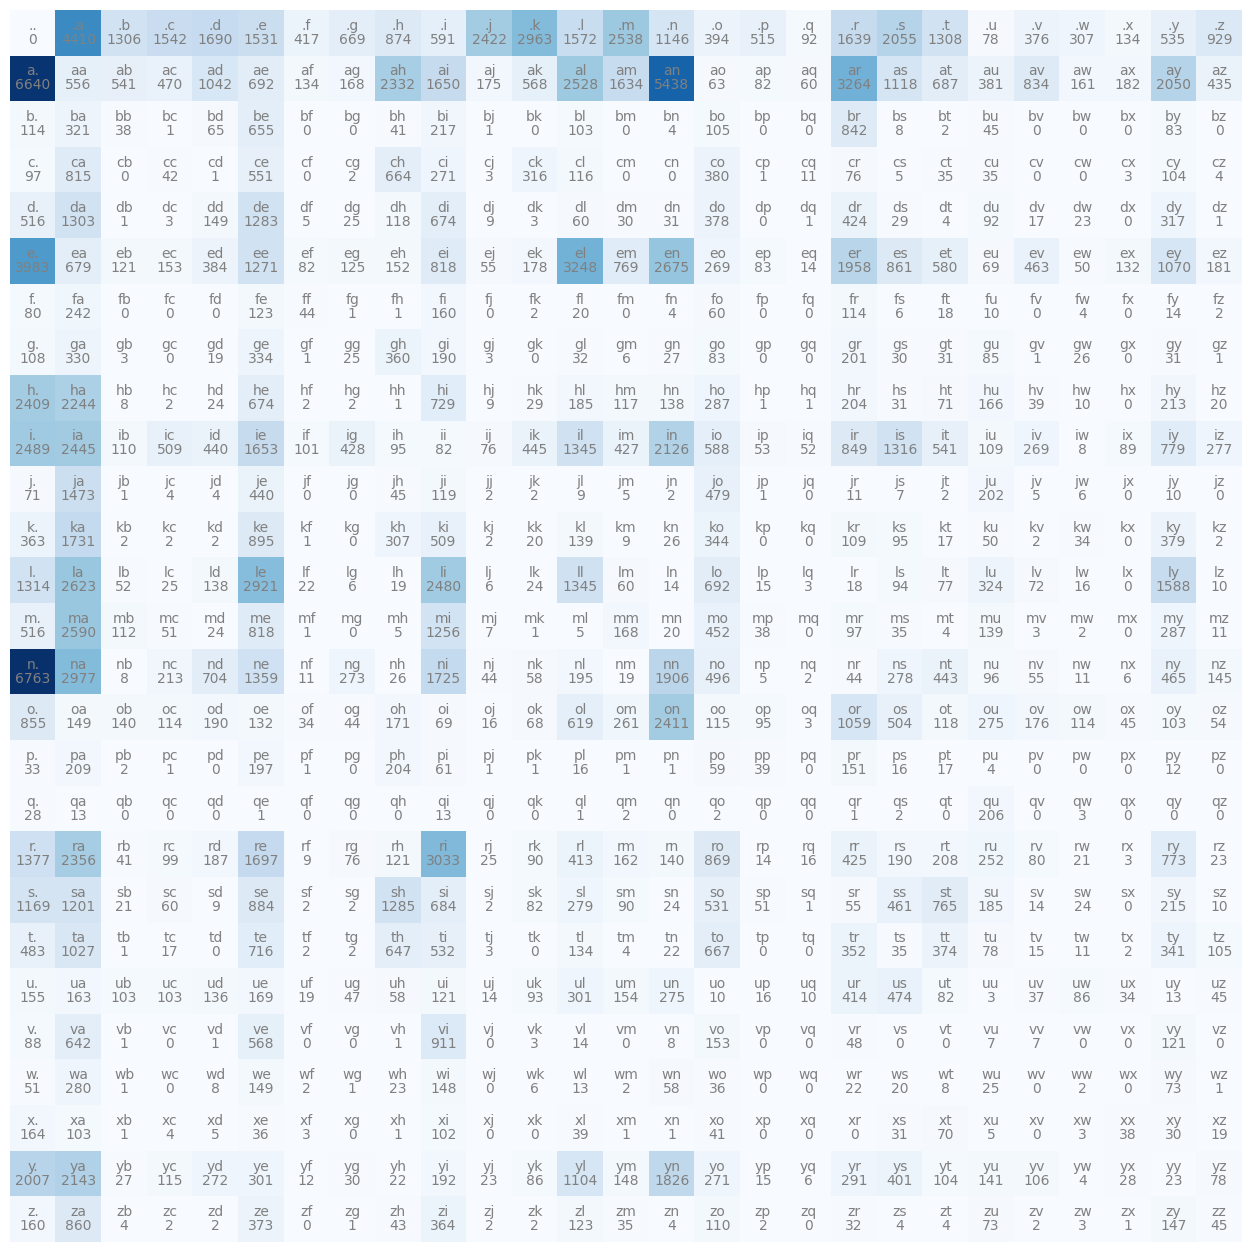

In [5]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = itoc[i] + itoc[j] # concat the letters itoc[i] and itoc[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray') # print the concatenated letters
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color='gray') # print the value of the N[i,j]
plt.axis('off')

In [24]:
p = N[0].float() 
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [ ]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = ctoi[ch1]
        ix2 = ctoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1

print(f"{log_likelihood=}")
nll = -log_likelihood
print(f"{nll=}")
print(f"{nll/n}")


log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [24]:
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = ctoi[ch1]
        ix2 = ctoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [29]:
ys

tensor([ 5, 13, 13,  1,  0])

In [30]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc.shape

torch.Size([5, 27])

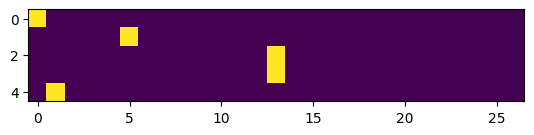

In [33]:
plt.imshow(xenc)